In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-06-27 05:13:46--  https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/bee_dataset/bee_dataset.py
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘bee_dataset.py’

bee_dataset.py          [ <=>                ] 178.99K  --.-KB/s    in 0.02s   

2024-06-27 05:13:46 (9.90 MB/s) - ‘bee_dataset.py’ saved [183282]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun 23 22:40 .
drwxr-xr-x 1 root root 4096 Jun 23 22:40 ..
drwxr-xr-x 4 root root 4096 Jun 23 22:40 test
drwxr-xr-x 4 root root 4096 Jun 23 22:40 train


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
import pathlib 
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") 
  return img


['287000.jpg']
Image shape:(512, 382, 3)


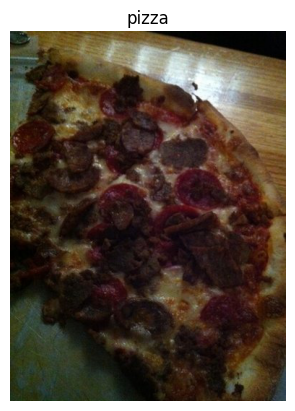

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[51, 60, 55],
        [43, 52, 47],
        [39, 49, 41],
        ...,
        [ 3,  4,  9],
        [ 3,  4,  9],
        [ 3,  4,  9]],

       [[38, 47, 42],
        [31, 42, 36],
        [29, 40, 32],
        ...,
        [ 4,  5, 10],
        [ 4,  5, 10],
        [ 4,  5, 10]],

       [[31, 42, 36],
        [27, 38, 32],
        [26, 37, 31],
        ...,
        [ 4,  5, 10],
        [ 4,  5, 10],
        [ 4,  5, 10]],

       ...,

       [[32, 52, 27],
        [29, 49, 24],
        [29, 47, 23],
        ...,
        [49, 69, 76],
        [52, 71, 78],
        [55, 74, 81]],

       [[32, 50, 26],
        [29, 47, 23],
        [29, 47, 23],
        ...,
        [56, 77, 82],
        [56, 75, 81],
        [56, 75, 81]],

       [[32, 50, 26],
        [34, 52, 28],
        [37, 55, 31],
        ...,
        [52, 73, 78],
        [53, 72, 78],
        [54, 73, 79]]], dtype=uint8)>

In [ ]:
img.shape  

(512, 382, 3)

In [ ]:
img/255.

array([[[0.2       , 0.23529412, 0.21568627],
        [0.16862745, 0.20392157, 0.18431373],
        [0.15294118, 0.19215686, 0.16078431],
        ...,
        [0.01176471, 0.01568627, 0.03529412],
        [0.01176471, 0.01568627, 0.03529412],
        [0.01176471, 0.01568627, 0.03529412]],

       [[0.14901961, 0.18431373, 0.16470588],
        [0.12156863, 0.16470588, 0.14117647],
        [0.11372549, 0.15686275, 0.1254902 ],
        ...,
        [0.01568627, 0.01960784, 0.03921569],
        [0.01568627, 0.01960784, 0.03921569],
        [0.01568627, 0.01960784, 0.03921569]],

       [[0.12156863, 0.16470588, 0.14117647],
        [0.10588235, 0.14901961, 0.1254902 ],
        [0.10196078, 0.14509804, 0.12156863],
        ...,
        [0.01568627, 0.01960784, 0.03921569],
        [0.01568627, 0.01960784, 0.03921569],
        [0.01568627, 0.01960784, 0.03921569]],

       ...,

       [[0.1254902 , 0.20392157, 0.10588235],
        [0.11372549, 0.19215686, 0.09411765],
        [0.11372549, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2,
                                 padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 38s 490ms/step - loss: 0.6085 - accuracy: 0.6400 - val_loss: 0.4022 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4685 - accuracy: 0.7840 - val_loss: 0.3552 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4632 - accuracy: 0.7807 - val_loss: 0.3778 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 15s 325ms/step - loss: 0.4041 - accuracy: 0.8233 - val_loss: 0.3701 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 14s 289ms/step - loss: 0.3736 - accuracy: 0.8400 - val_loss: 0.3253 - val_accuracy: 0.8540


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

['2133717.jpg']
Image shape:(512, 512, 3)
['2572958.jpg']
Image shape:(512, 512, 3)


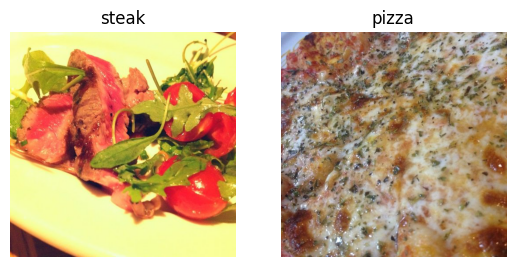

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

# 2. preprocess the data (prepared it for model)

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,  
                                               target_size=(224,224), 
                                               class_mode="binary",
                                               batch_size=32)


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()  
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10, 
           kernel_size=3, 
           strides=1,  
           padding="valid", 
           activation="relu",
           input_shape=(224,224,3)), 

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") 
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,  
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 13s 244ms/step - loss: 0.9043 - accuracy: 0.5687 - val_loss: 0.5469 - val_accuracy: 0.7400
Epoch 2/10
47/47 [==============================] - 11s 231ms/step - loss: 0.4737 - accuracy: 0.7967 - val_loss: 0.4635 - val_accuracy: 0.7880
Epoch 3/10
47/47 [==============================] - 13s 271ms/step - loss: 0.2867 - accuracy: 0.8913 - val_loss: 0.4118 - val_accuracy: 0.8120
Epoch 4/10
47/47 [==============================] - 11s 231ms/step - loss: 0.1028 - accuracy: 0.9733 - val_loss: 0.4805 - val_accuracy: 0.8020
Epoch 5/10
47/47 [==============================] - 10s 215ms/step - loss: 0.0291 - accuracy: 0.9947 - val_loss: 0.5558 - val_accuracy: 0.7960
Epoch 6/10
47/47 [==============================] - 11s 224ms/step - loss: 0.0137 - accuracy: 0.9973 - val_loss: 0.6337 - val_accuracy: 0.8080
Epoch 7/10
47/47 [==============================] - 15s 320ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.8257 - val_accuracy: 0.7700

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 3s 184ms/step - loss: 0.8382 - accuracy: 0.7880


[0.8382365703582764, 0.7879999876022339]

<Axes: >

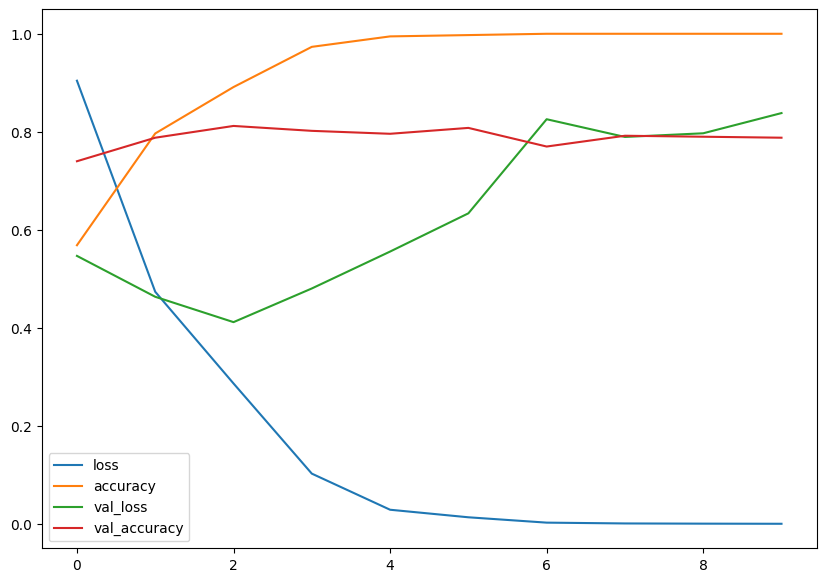

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  """
  returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) 

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

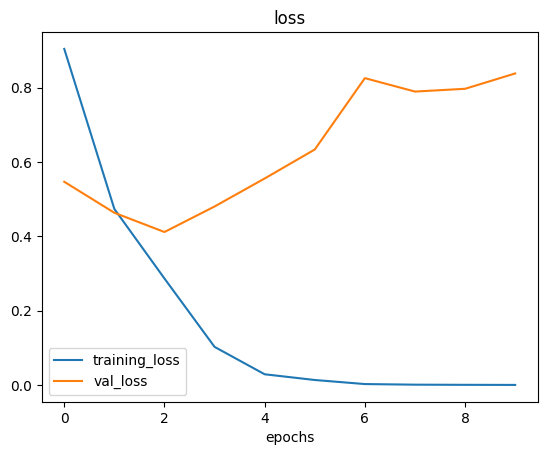

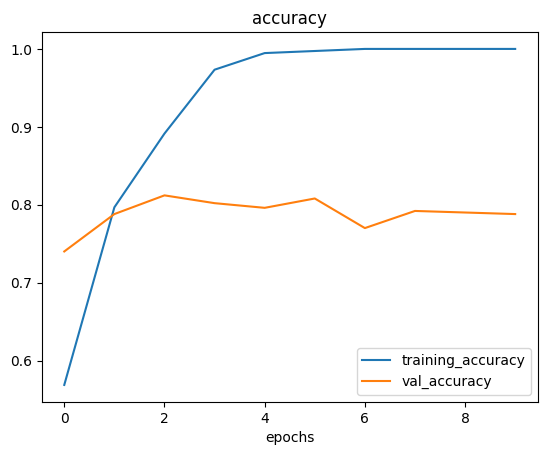

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,  
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 257ms/step - loss: 0.6169 - accuracy: 0.6480 - val_loss: 0.5116 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4767 - accuracy: 0.7820 - val_loss: 0.4002 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4406 - accuracy: 0.8067 - val_loss: 0.3753 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4140 - accuracy: 0.8213 - val_loss: 0.3589 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3868 - accuracy: 0.8367 - val_loss: 0.3508 - val_accuracy: 0.8620


In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


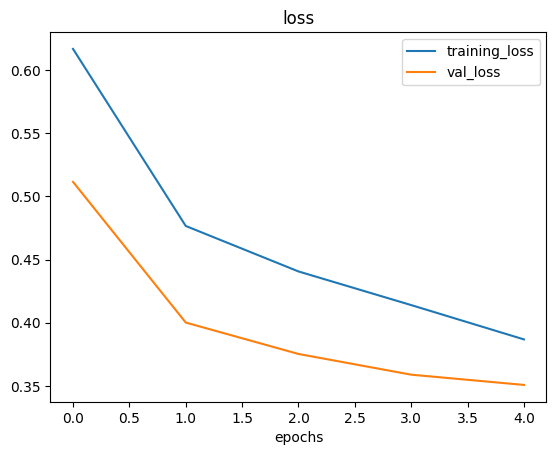

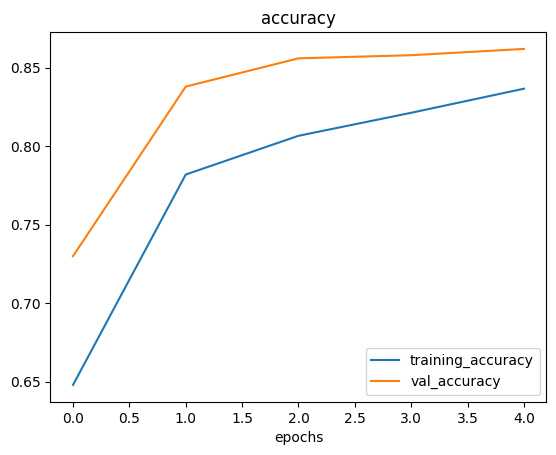

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 145ms/step - loss: 0.3508 - accuracy: 0.8620


[0.35077419877052307, 0.8619999885559082]

#opening our bag of tricks and finding data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented trining data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 


print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented trining data
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # 

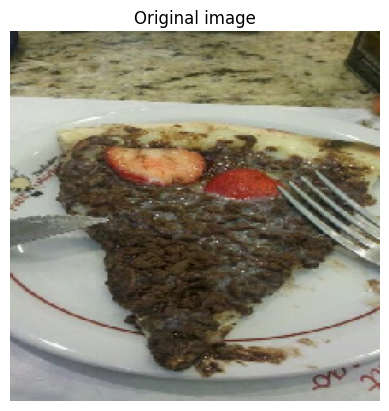

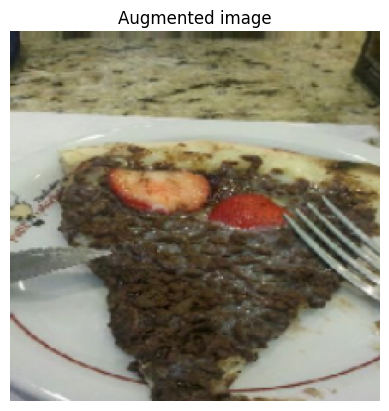

In [ ]:
random_number = random.randint(0, 32) 
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 32s 635ms/step - loss: 0.7078 - accuracy: 0.4893 - val_loss: 0.6749 - val_accuracy: 0.6500
Epoch 2/10
47/47 [==============================] - 25s 521ms/step - loss: 0.6991 - accuracy: 0.5567 - val_loss: 0.6653 - val_accuracy: 0.6800
Epoch 3/10
47/47 [==============================] - 24s 520ms/step - loss: 0.6449 - accuracy: 0.6433 - val_loss: 1.3328 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 25s 536ms/step - loss: 0.7480 - accuracy: 0.4927 - val_loss: 0.6558 - val_accuracy: 0.5480
Epoch 5/10
47/47 [==============================] - 34s 732ms/step - loss: 0.6781 - accuracy: 0.5540 - val_loss: 0.6533 - val_accuracy: 0.6640
Epoch 6/10
47/47 [==============================] - 27s 582ms/step - loss: 0.6855 - accuracy: 0.5473 - val_loss: 0.6791 - val_accuracy: 0.6620
Epoch 7/10
47/47 [==============================] - 37s 785ms/step - loss: 0.6777 - accuracy: 0.5847 - val_loss: 0.6264 - val_accuracy: 0.6980

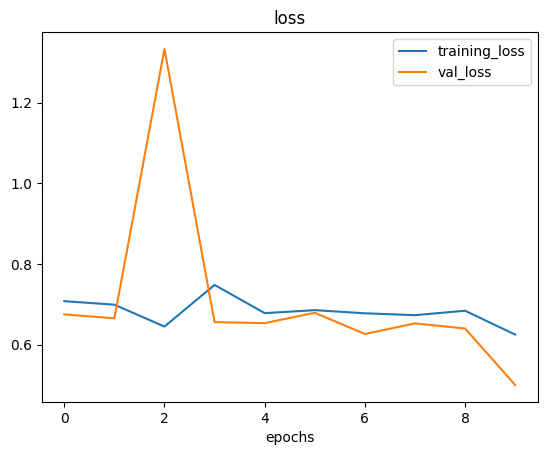

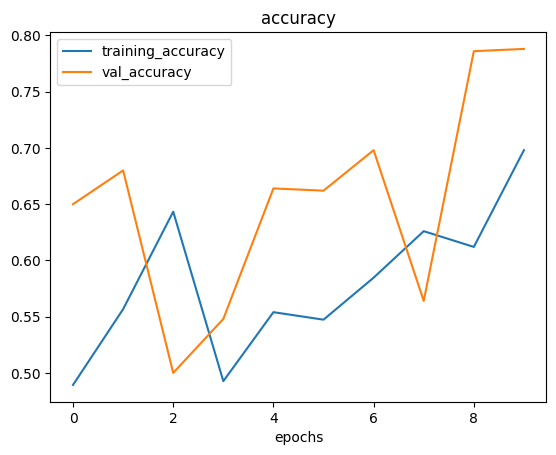

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) #shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 32s 567ms/step - loss: 0.6568 - accuracy: 0.5927 - val_loss: 0.5122 - val_accuracy: 0.7600
Epoch 2/10
47/47 [==============================] - 24s 522ms/step - loss: 0.5643 - accuracy: 0.7080 - val_loss: 0.4207 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 27s 573ms/step - loss: 0.5273 - accuracy: 0.7493 - val_loss: 0.3877 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 25s 539ms/step - loss: 0.4996 - accuracy: 0.7653 - val_loss: 0.3667 - val_accuracy: 0.8280
Epoch 5/10
47/47 [==============================] - 25s 529ms/step - loss: 0.4887 - accuracy: 0.7753 - val_loss: 0.3805 - val_accuracy: 0.8340
Epoch 6/10
47/47 [==============================] - 25s 533ms/step - loss: 0.4973 - accuracy: 0.7613 - val_loss: 0.3803 - val_accuracy: 0.8500
Epoch 7/10
47/47 [==============================] - 27s 566ms/step - loss: 0.4653 - accuracy: 0.7967 - val_loss: 0.3688 - val_accuracy: 0.8460

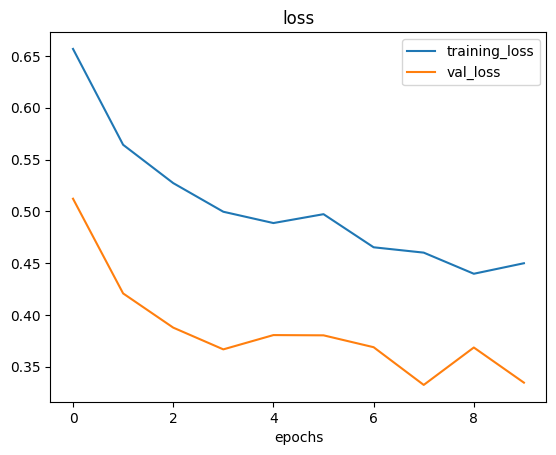

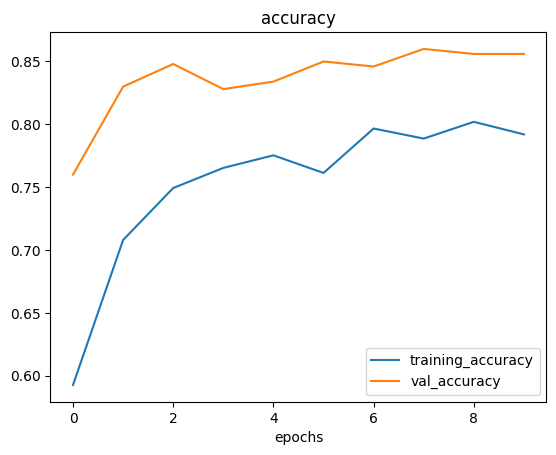

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 530ms/step - loss: 0.6248 - accuracy: 0.6500 - val_loss: 0.5046 - val_accuracy: 0.7260
Epoch 2/10
47/47 [==============================] - 29s 621ms/step - loss: 0.5030 - accuracy: 0.7553 - val_loss: 0.3841 - val_accuracy: 0.8260
Epoch 3/10
47/47 [==============================] - 26s 539ms/step - loss: 0.5210 - accuracy: 0.7500 - val_loss: 0.3872 - val_accuracy: 0.8340
Epoch 4/10
47/47 [==============================] - 25s 535ms/step - loss: 0.4696 - accuracy: 0.7927 - val_loss: 0.3358 - val_accuracy: 0.8500
Epoch 5/10
47/47 [==============================] - 25s 530ms/step - loss: 0.4624 - accuracy: 0.7860 - val_loss: 0.3268 - val_accuracy: 0.8760
Epoch 6/10
47/47 [==============================] - 25s 539ms/step - loss: 0.4457 - accuracy: 0.8047 - val_loss: 0.4360 - val_accuracy: 0.7960
Epoch 7/10
47/47 [==============================] - 25s 530ms/step - loss: 0.4476 - accuracy: 0.8000 - val_loss: 0.3130 - val_accuracy: 0.8780

In [ ]:
print(class_names)

['pizza' 'steak']


--2023-06-23 23:01:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-06-23 23:01:18 (120 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

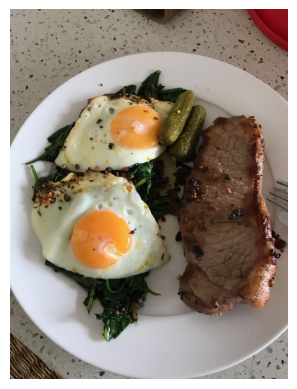

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

**note** when we train a neural network and we want to make a prediction with it on our own custom data, it's important that our custom data (or new data) is processed into the same formet as the data our model was trained on

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
def load_and_prep_image(filename,img_shape=224):
  """
  reads an image from filename, turns it into tensor and reshaspe it ti (img_shape,img_shape,colour_channels)
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 176ms/step


array([[0.8268132]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class


'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 147ms/step


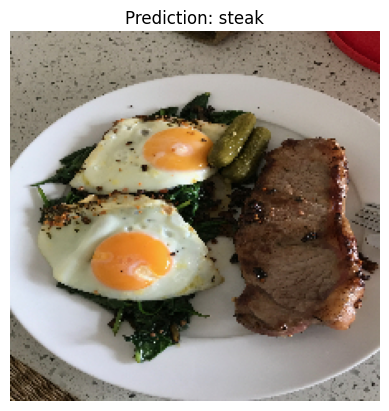

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-06-23 23:01:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-06-23 23:01:22 (220 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 19ms/step


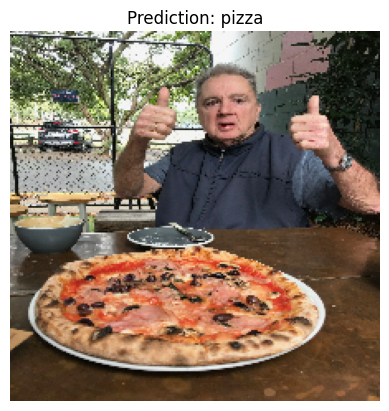

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)